<a href="https://colab.research.google.com/github/alyssaimani/Drug_Discovery_Acetylcholinesterase/blob/main/Drug_Discovery_acetylcholinesterase_Classification_with_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, r2_score,roc_auc_score, precision_recall_curve, auc

In [33]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [34]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Bioinformatics/Acetylcholinesterase/acetylcholinesterase_bioactivity_data_3class_pIC50_pubchem_fp.csv") 

# **Input Features**
The **Acetylcholinesterase** data set contains 881 input features and output 2 class ('active' and 'inactive')

In [35]:
x = df.drop('pIC50', axis=1)
x = pd.DataFrame(x)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3593,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3594,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3595,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **Output Features**

In [36]:
df_3class = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Bioinformatics/Acetylcholinesterase/acetylcholinesterase_bioactivity_data_3class_pIC50.csv')
df_3class

,Unnamed: 0,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
3592,3592,CHEMBL3752451,intermediate,O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)c1cc2ccccc2o1,441.575,6.2621,2.0,4.0,6.372634
3593,3593,CHEMBL3752555,inactive,O=C(NCCCCCCNc1c2c(nc3ccccc13)CCC2)c1cc2ccccc2o1,427.548,5.8720,2.0,4.0,6.263603
3594,3594,CHEMBL3752227,intermediate,CCN(CCCCCCCCc1cccc(OC)c1)Cc1ccccc1OC,383.576,6.1090,0.0,3.0,5.247952
3595,3595,CHEMBL3759090,intermediate,CC(C)=CC[C@H]1C[C@@]2(CC=C(C)C)C(=O)O[C@@](CC=...,568.795,7.0602,1.0,6.0,5.017729


In [37]:
y = df_3class.bioactivity_class
y = pd.DataFrame(y)
y

,bioactivity_class
0,active
1,active
2,inactive
3,active
4,active
...,...
3592,intermediate
3593,inactive
3594,intermediate
3595,intermediate


In [38]:
df_3class = pd.concat([x, y],axis=1)
df_3class

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,intermediate
3593,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
3594,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,intermediate
3595,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,intermediate


## **Eliminate intermediate class**

In [39]:
df_2class = df_3class[df_3class.bioactivity_class != 'intermediate']
df_2class

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
3587,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3588,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
3593,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive


## **Distribute 2 Class dataset into features and output dataset**

In [40]:
x = df_2class.drop('bioactivity_class', axis=1)
x = pd.DataFrame(x)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3587,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3588,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3593,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y = df_2class.bioactivity_class
y = pd.DataFrame(y)
y

,bioactivity_class
0,active
1,active
2,inactive
3,active
4,active
...,...
3583,inactive
3587,active
3588,inactive
3593,inactive


## **Integer Encoding Bioactivity Class**

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label_mapping = {"active": 1, "inactive": 0}
y['bioactivity_code'] = le.fit_transform([label_mapping[bioactivity_class] for bioactivity_class in y['bioactivity_class']])
y = y['bioactivity_code']
y

0       1
1       1
2       0
3       1
4       1
       ..
3583    0
3587    1
3588    0
3593    0
3596    0
Name: bioactivity_code, Length: 2728, dtype: int64

In [46]:
x.shape

(2728, 881)

In [47]:
y.shape

(2728,)

## **Remove low variance features**

In [48]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
x = selection.fit_transform(x)

In [49]:
x.shape

(2728, 134)

# **Data Split (80/20 ratio)**

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
x_train.shape, y_train.shape

((2182, 134), (2182,))

In [52]:
x_test.shape, y_test.shape

((546, 134), (546,))

# **Build a Classification Model using RandomForestClassifier**

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
hist = model.fit(x_train, y_train)

In [54]:
y_pred = hist.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [59]:
r2 = r2_score(y_test, y_pred)
mse = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_prc = auc(recall, recall)
auc_roc = roc_auc_score(y_test, y_pred)
print("accuraccy :", mse)
print("f1 :", f1)
print("AUPRC :", auc_prc)
print("AUROC :", auc_roc)

accuraccy : 0.6959706959706959
f1 : 0.7186440677966103
AUPRC : 0.5
AUROC : 0.6939499388679145


# **Scatter Plot of Experimental vs Predicted pIC50 Values**

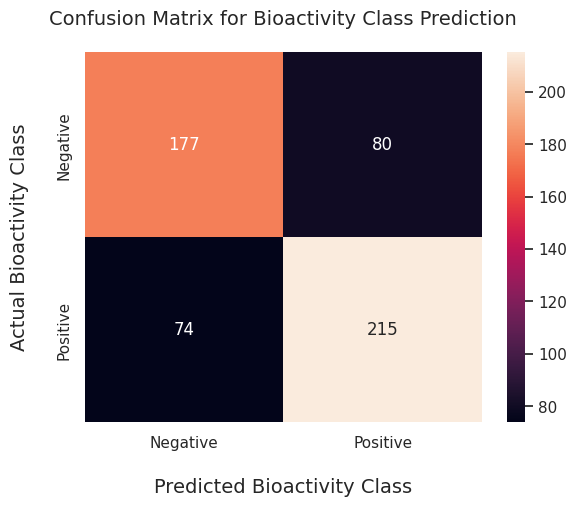

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Bioactivity Class", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Bioactivity Class", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for Bioactivity Class Prediction", fontsize=14, pad=20)

plt.show()

In [ ]:
import pickle
pickle.dump(model, open('/content/gdrive/My Drive/Colab Notebooks/Bioinformatics/Acetylcholinesterase/random_forest_classification.pkl', 'wb'))